<a href="https://colab.research.google.com/github/ACoronaGuzman/Metodos/blob/main/Practica_4_Interpolaci%C3%B3n_de_Hermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from math import *
import numpy as np
import matplotlib . pyplot as plt
import sympy as sym

In [78]:
#valores iniciales
x=np.array([1.3,1.6,1.9])
f=np.array([0.6200860, 0.4554022, 0.2818186])
d=np.array([-0.5220232, -0.5698959, -0.5811571])
n=(x.size)
#arreglo donde se guardan los valores
Q=np.zeros((2*n,2*n))
z=np.zeros(2*n)
#valores para interpolar
xi=1.5
H=Q[0,0]

In [79]:
#construccion del Método de Hermite (construcción de la tabla de diferencias)
for i in range(0,n):
  z[2*i]=x[i]
  z[2*i+1]=x[i]
  Q[2*i,0]=f[i]
  Q[2*i+1,0]=f[i]
  Q[2*i+1,1]=d[i]
  if i !=0:
    Q[2*i,1]=(Q[2*i,0]-Q[2*i-1,0])/(z[2*i]-z[2*i-1])

for i in range(2,2*n):
  for j in range(2,i+1):
    Q[i,j]=(Q[i,j-1]-Q[i-1,j-1])/(z[i]-z[i-j])
print("f(z)\t\t  1°Dif\t\t2°Dif\t     3°Dif\t  4°Dif\t     5°Dif")
print(Q)

f(z)		  1°Dif		2°Dif	     3°Dif	  4°Dif	     5°Dif
[[ 0.620086    0.          0.          0.          0.          0.        ]
 [ 0.620086   -0.5220232   0.          0.          0.          0.        ]
 [ 0.4554022  -0.548946   -0.08974267  0.          0.          0.        ]
 [ 0.4554022  -0.5698959  -0.069833    0.06636556  0.          0.        ]
 [ 0.2818186  -0.578612   -0.02905367  0.06796556  0.00266667  0.        ]
 [ 0.2818186  -0.5811571  -0.00848367  0.06856667  0.00100185 -0.00277469]]


In [107]:
# calcula la interpolacion de xi
m=z.size
x0=1
H=Q[0,0]
for k in range (1,m) :
  x0= x0*( xi- z[k-1])
  H= H +Q[k,k] * x0

print ("El valor Interpolado de",xi,"es: ", H)


El valor Interpolado de 1.5 es:  0.5118277017283951


In [108]:
#calculamos el polinomio
m=z.size
x0=1
F=Q[0,0]
s = sym.Symbol('x')
for k in range (1,m) :
  x0= x0*( s - z[k-1])
  F= F +Q[k,k] * x0

p=F.expand()
print("Sea el polinomio:")
print("P(x)=",p)
#Para sustituir el valor a interpolar
#px = sym.lambdify(s,p)
#print(p.subs(s,1.5))

Sea el polinomio:
P(x)= -0.00277469135798944*x**5 + 0.0240317901231809*x**4 - 0.0145560802460553*x**3 - 0.235216169754413*x**2 - 0.00822922345577151*x + 1.00194406469105


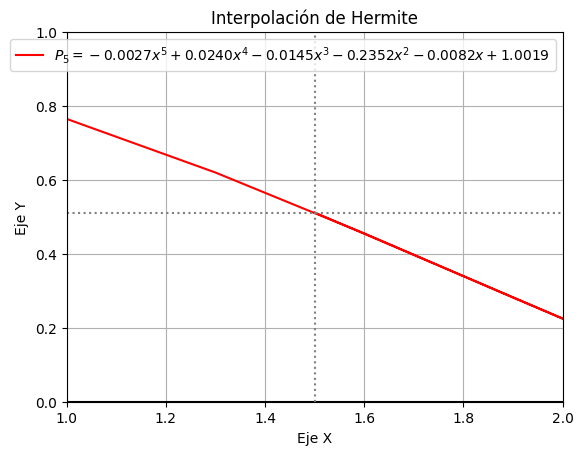

In [112]:
#construccion del polinomio para graficar
x = np.array ([1.0,1.3 ,1.6 ,1.9 ,2.2])
f = np.array ([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])
a=np.append(x,xi)
b=np.append(f,H)
plt.plot(a,b,color="red",label=r'$P_5=-0.0027x^5+0.0240x^4-0.0145x^3-0.2352x^2-0.0082x+1.0019$')
plt.legend(loc = 'upper right')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.axvline(1.5, color="grey", linestyle='dotted')
plt.axhline(0.5118200, color="grey", linestyle='dotted')
plt.xlim(1, 2)
plt.ylim(0, 1)
plt.title("Interpolación de Hermite")
plt.grid()
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
#plt.savefig("output.png") # Guardar gráfico como imágen PNG.
# Mostrarlo.
plt.show()